# Problem Statement

## To create a model that predicts life expectancy based on given variables. This is a  regression task.

## Importing Libraries and Dataset



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv('Life Expectancy Data_HV22.csv')

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
data.describe(include='O')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


- There are 21 features- 2 categorical and the rest numerical
- The target variable life expectancy is measured as ones age and is numeric in nature
- There are a total of 2938 observations

# Domain Analysis

Country: Country

Year: Year

Status: Country Developed or Developing status

Life expectancy: Life expectancy in age

Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths: Number of Infant Deaths per 1000 population

Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) 

percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles: Measles - number of reported cases per 1000 population

BMI: Average Body Mass Index of entire population 

under-five deaths: Number of under-five deaths per 1000 population

Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP: Gross Domestic Product per capita (in USD)

Population: Population of the country

thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)

thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)

Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling: Number of years of Schooling(years)

# EDA

## Univariate Analysis


In [7]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
names = data.columns.tolist()
names[names.index('Life expectancy ')] = 'Life_expectancy'
data.columns = names


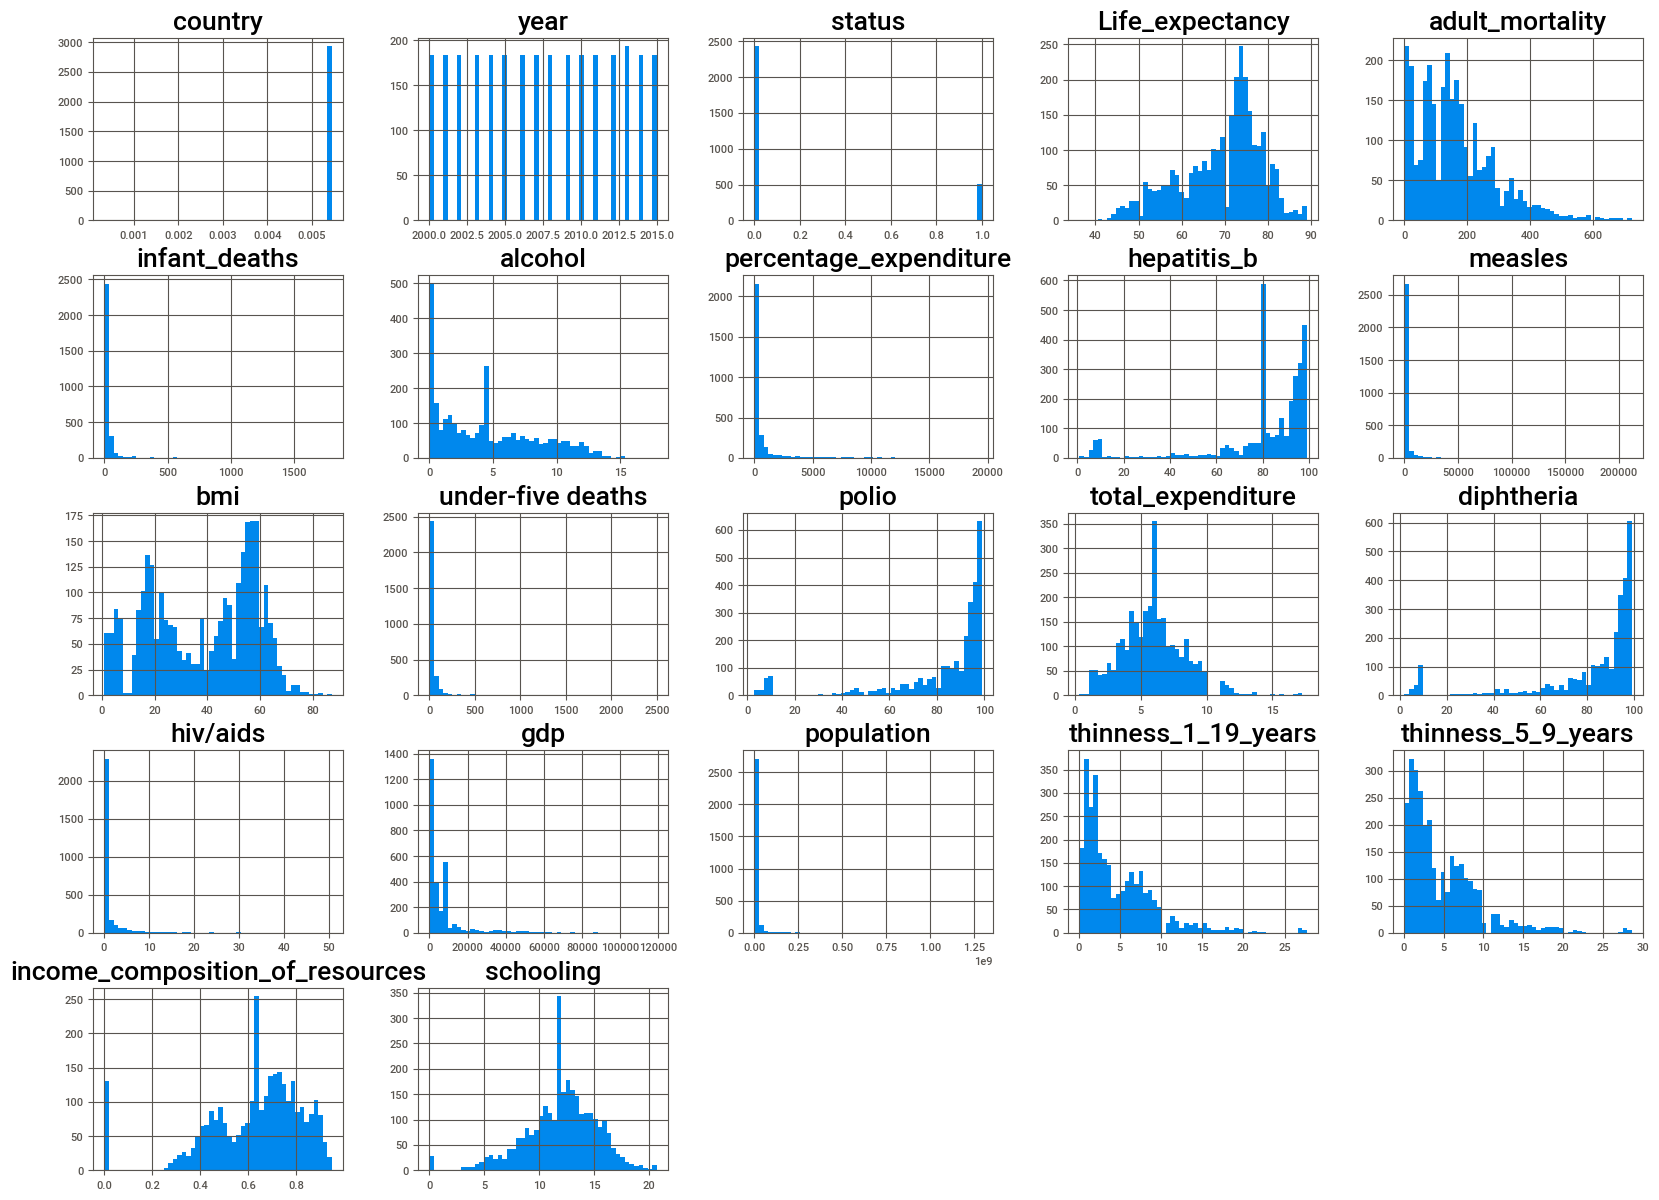

In [39]:
data.hist(bins=50,figsize=(20,15))
plt.show()

- Positively skewed Features
    - adult mortality
    - alcohol
    - thinness_1_19_years
    - thinness_5_9_years
- Negatively skewed features
    - diphtheria
    - polio
- Normally distributed
    - schooling
    - total expenditure

## Bivariate Analysis

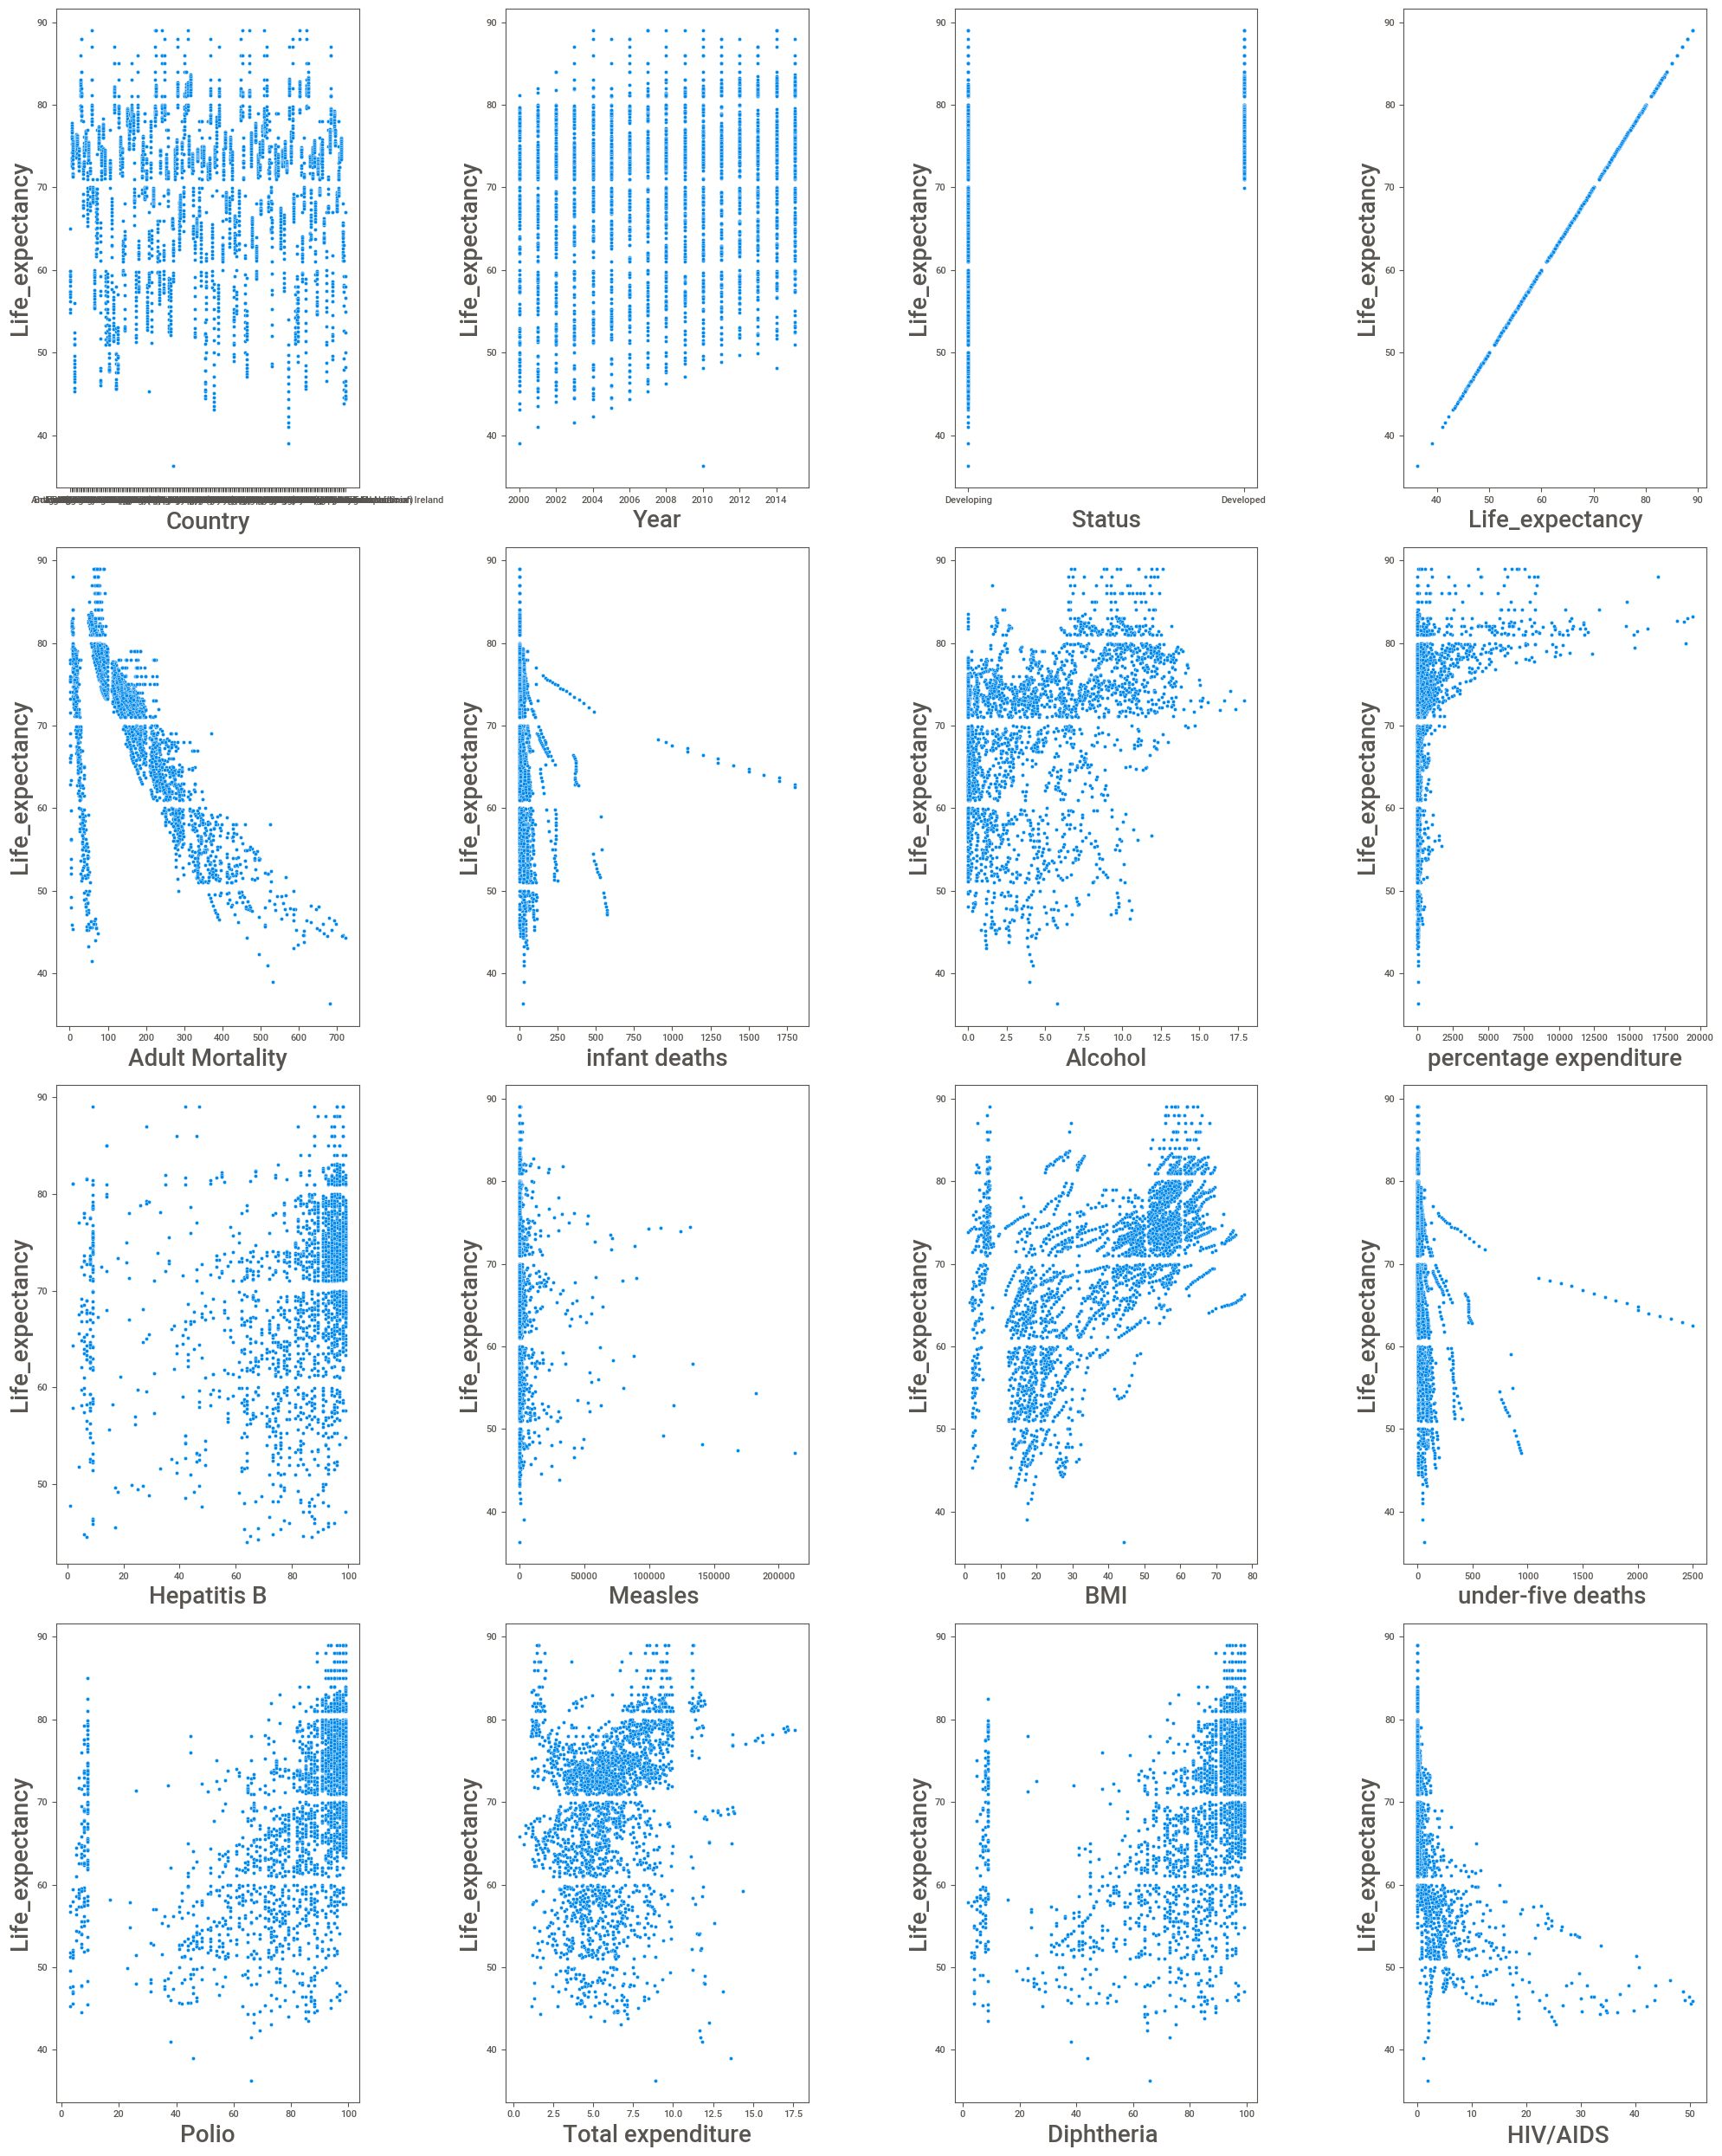

In [10]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graph
        sns.scatterplot(x=data[column].dropna(axis=0)#scatter plot
                        ,y=data.Life_expectancy)
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Life_expectancy',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

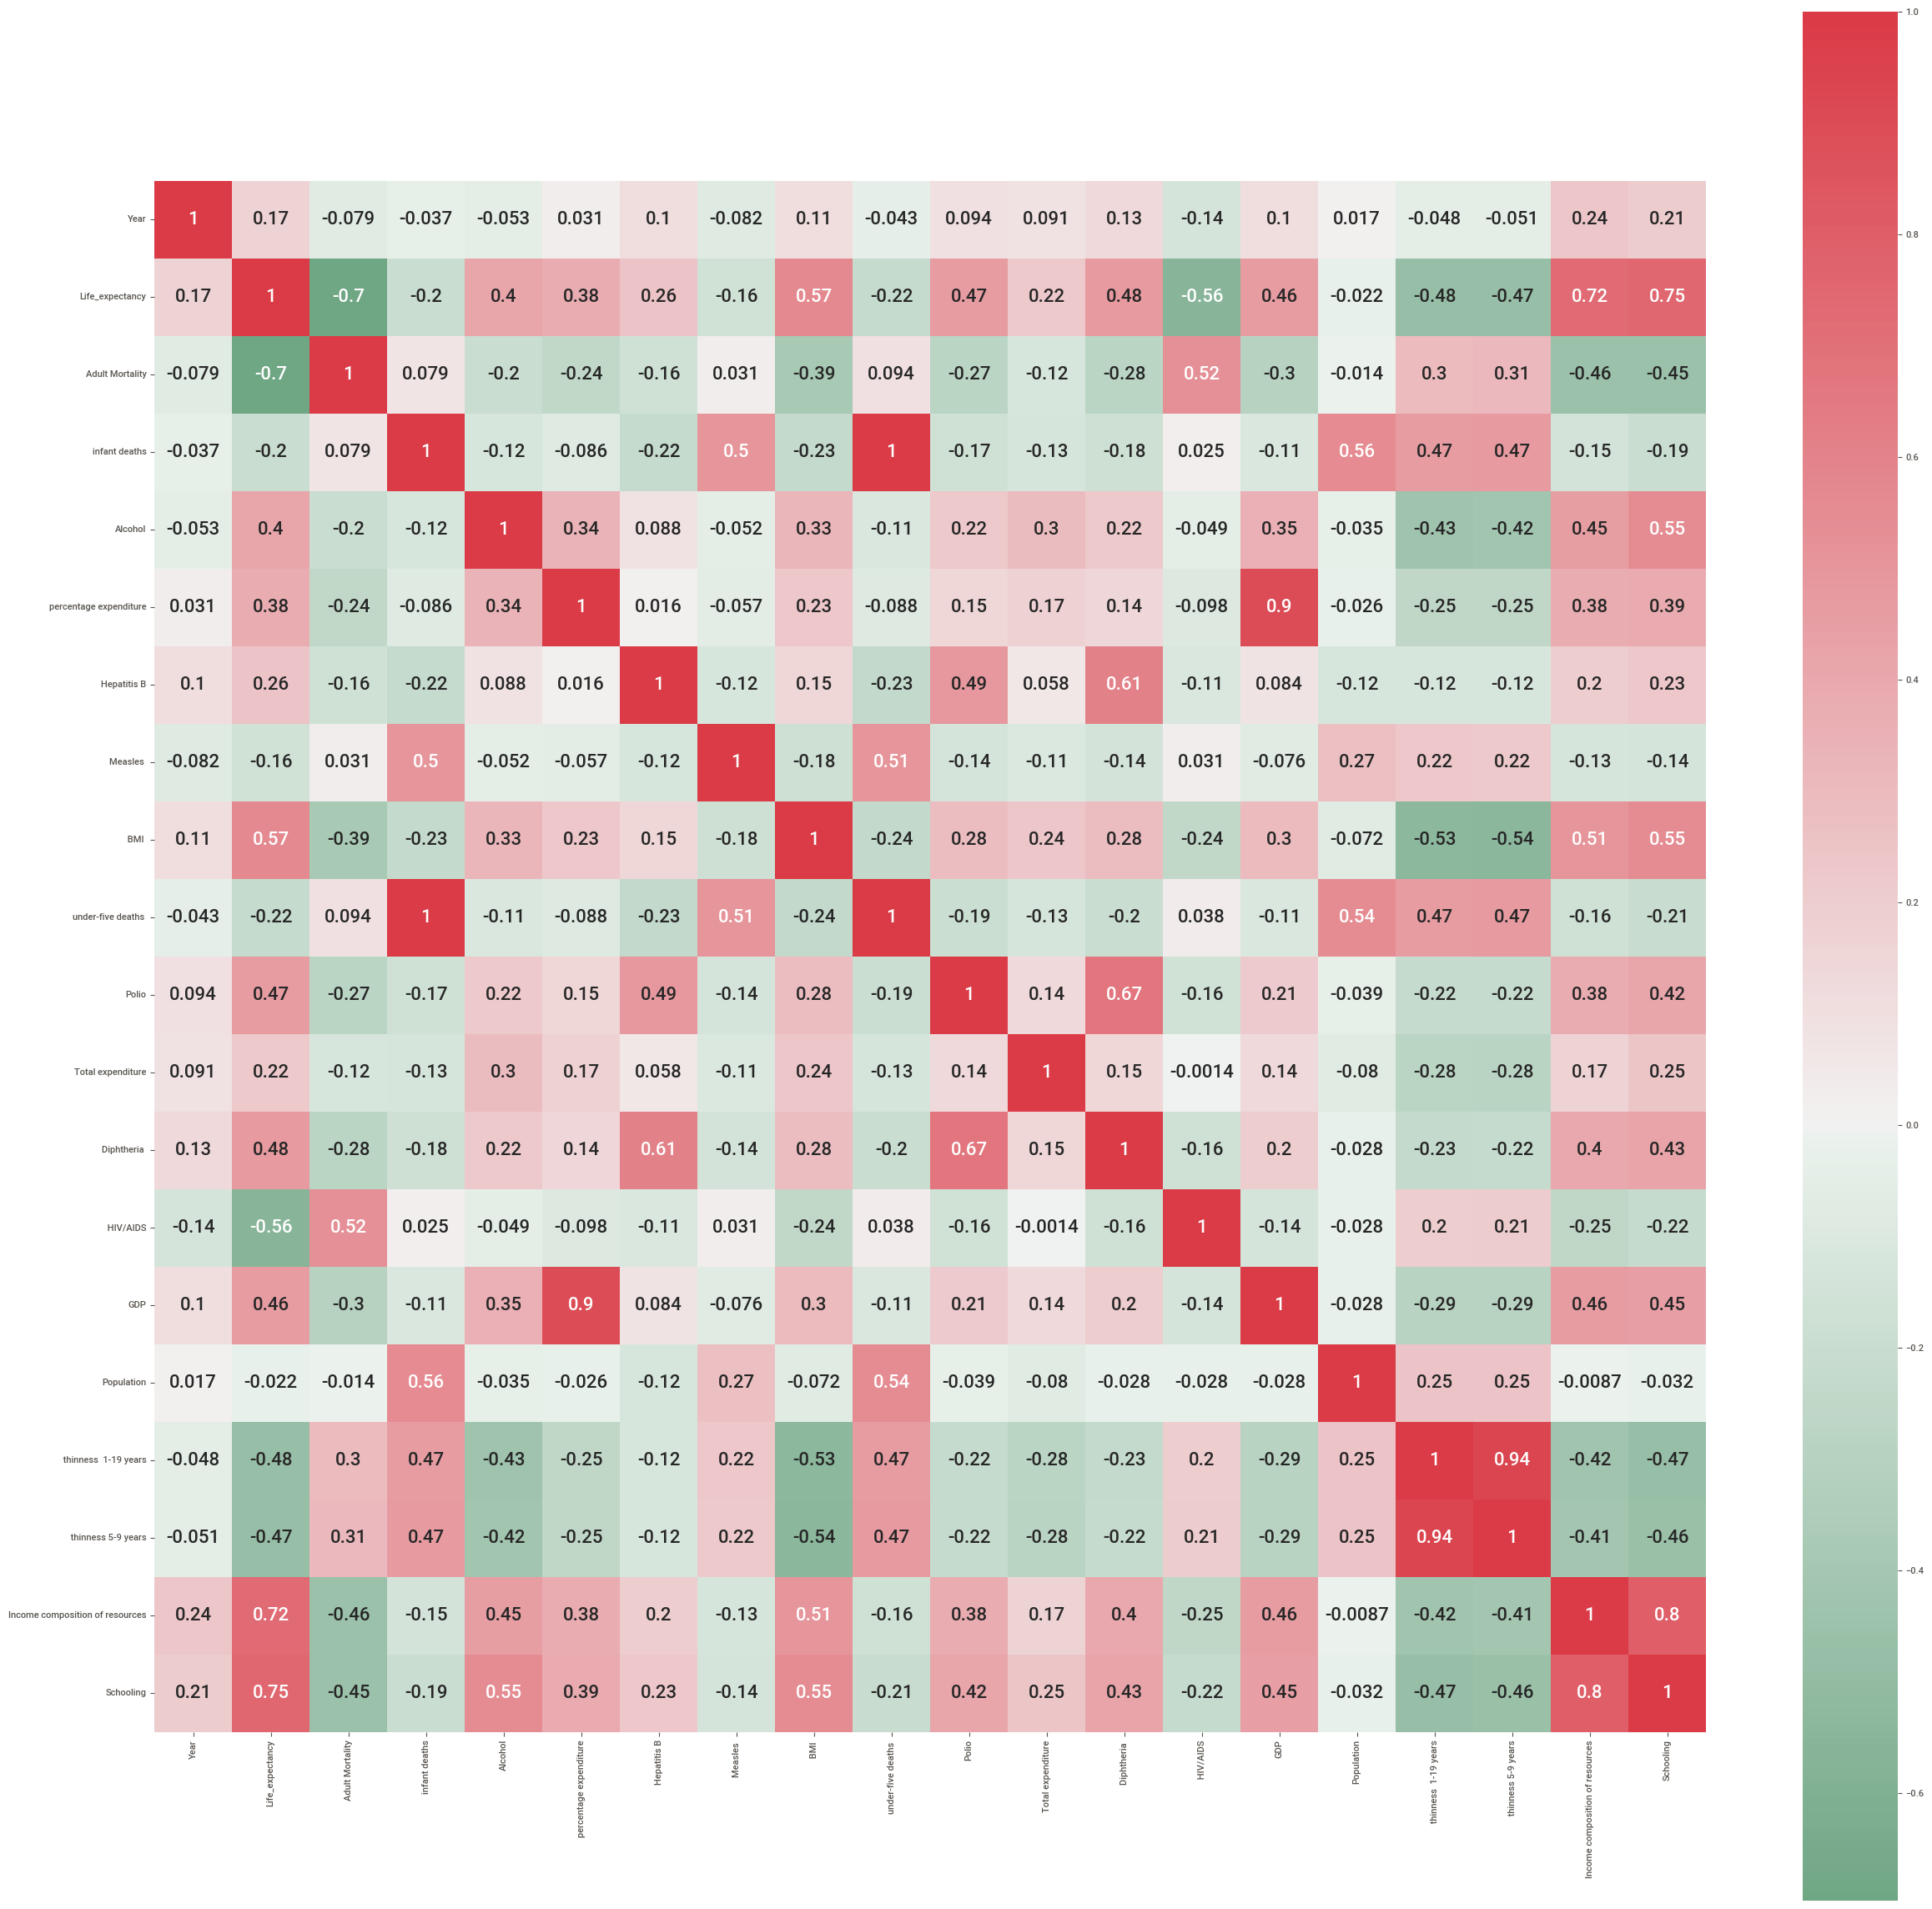

In [11]:
cmap = sns.diverging_palette(500, 10, as_cmap=True)
fig,ax=plt.subplots(figsize=(30,30))
plt.rcParams.update({'font.size':16})
sns.heatmap(data.corr(), cmap=cmap, center=0, annot=True, square=True,ax=ax);

# Data Preprocessing


In [12]:
data.rename(columns = {'Country':'country',
                       'Year':'year',
                       'Status':'status',
                       'Life expectancy ':'life_expectancy', 
                       'Adult Mortality':'adult_mortality', 
                       'infant deaths':'infant_deaths',
                       'Alcohol':'alcohol',
                       'percentage expenditure':'percentage_expenditure',
                       'Hepatitis B':'hepatitis_b',
                       'Measles ':'measles',
                       ' BMI ':'bmi',
                       'under-five deaths ':'under-five deaths',
                       'Polio':'polio',
                       'Total expenditure':'total_expenditure',
                       'Diphtheria ':'diphtheria',
                       ' HIV/AIDS':'hiv/aids',
                       'GDP':'gdp',
                       'Population':'population',
                       ' thinness  1-19 years':'thinness_1_19_years',
                       ' thinness 5-9 years':'thinness_5_9_years',
                       'Income composition of resources':'income_composition_of_resources',
                       'Schooling':'schooling'
                       }, inplace = True)

## Handling missing values

In [13]:
data.isnull().sum()

country                              0
year                                 0
status                               0
Life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [14]:
clmns_with_missing_values=['Life_expectancy','adult_mortality','alcohol','hepatitis_b','bmi','polio','total_expenditure','diphtheria','gdp','population', 
                          'thinness_1_19_years','thinness_5_9_years','income_composition_of_resources', 'schooling'  ]


In [15]:

for column in clmns_with_missing_values:
    data[column].fillna(data[column].mean(), inplace = True)
data.isnull().sum()

country                            0
year                               0
status                             0
Life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1_19_years                0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

#### Since decision tree algorithms are robust to outliers we dont need to handle outliers.

## Categorical Encoding

In [16]:
# For Country column we will use frequency encoding

country = (data.groupby('country').size()) / len(data)
country

country
Afghanistan                           0.005446
Albania                               0.005446
Algeria                               0.005446
Angola                                0.005446
Antigua and Barbuda                   0.005446
                                        ...   
Venezuela (Bolivarian Republic of)    0.005446
Viet Nam                              0.005446
Yemen                                 0.005446
Zambia                                0.005446
Zimbabwe                              0.005446
Length: 193, dtype: float64

In [17]:
data['country'] = data['country'].apply(lambda x : country[x])
data.head()

,country,year,status,Life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,0.005446,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0.005446,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0.005446,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0.005446,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0.005446,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [18]:
data.status = data.status.map({'Developing':0,'Developed':1})
data.head()

,country,year,status,Life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,0.005446,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0.005446,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0.005446,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0.005446,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0.005446,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Model Creation- Random forest regressor

## Splitting the dataset

In [19]:
## Creating independent and dependent variable
X = data.drop('Life_expectancy', axis=1)
y = data.Life_expectancy

#### Since RandomForestregressor algorithm is based on partitioning/branching and not the actual values we dont require standardisation or normalisation



In [20]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [22]:
y_pred = model.predict(X_test)

## Evaluation 

In [23]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred,squared=False) 
rmse

1.763400556145771

## Feature Importance

In [24]:
model.feature_importances_

array([7.61179967e-05, 7.17321923e-03, 1.88797592e-04, 1.58863446e-01,
       4.59669620e-03, 8.21815428e-03, 3.34798463e-03, 1.96534237e-03,
       3.29823096e-03, 1.66037749e-02, 1.13667915e-02, 3.00237948e-03,
       5.16136553e-03, 3.53536240e-03, 5.90091668e-01, 3.60027063e-03,
       3.52642156e-03, 4.74371364e-03, 9.48775392e-03, 1.35738459e-01,
       2.54140512e-02])

<AxesSubplot:>

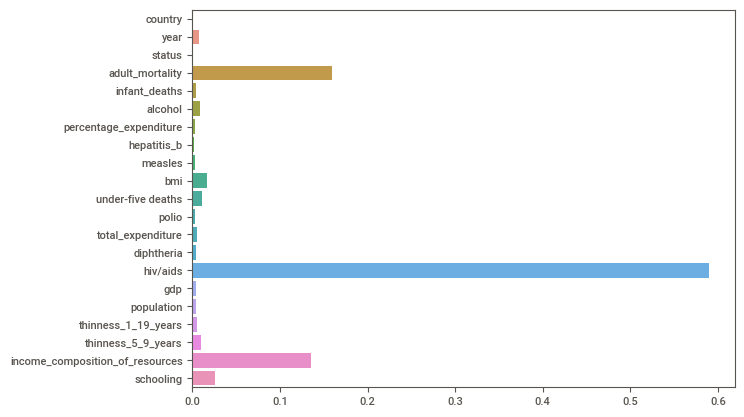

In [25]:
fig,ax=plt.subplots(figsize=(7,5))
sns.barplot(y = X.columns, x = model.feature_importances_, ax = ax)

### Feature importance reveals which features are most useful in predicting the target variable. The top 5 features will be selected for creating a multiple linear regression model.

In [40]:
top_features = ['hiv/aids','adult_mortality','income_composition_of_resources','schooling','bmi']
drop_features =[]
for column in data.columns:
    if column not in top_features:
        drop_features.append(column)
drop_features

['country',
 'year',
 'status',
 'Life_expectancy',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'under-five deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'gdp',
 'population',
 'thinness_1_19_years',
 'thinness_5_9_years']

## Multiple Linear Regression

In [27]:
reg_data = data[top_features]
reg_data

,hiv/aids,adult_mortality,income_composition_of_resources,schooling,bmi
0,0.1,263.0,0.479,10.1,19.1
1,0.1,271.0,0.476,10.0,18.6
2,0.1,268.0,0.470,9.9,18.1
3,0.1,272.0,0.463,9.8,17.6
4,0.1,275.0,0.454,9.5,17.2
...,...,...,...,...,...
2933,33.6,723.0,0.407,9.2,27.1
2934,36.7,715.0,0.418,9.5,26.7
2935,39.8,73.0,0.427,10.0,26.3
2936,42.1,686.0,0.427,9.8,25.9


## Checking for Outliers


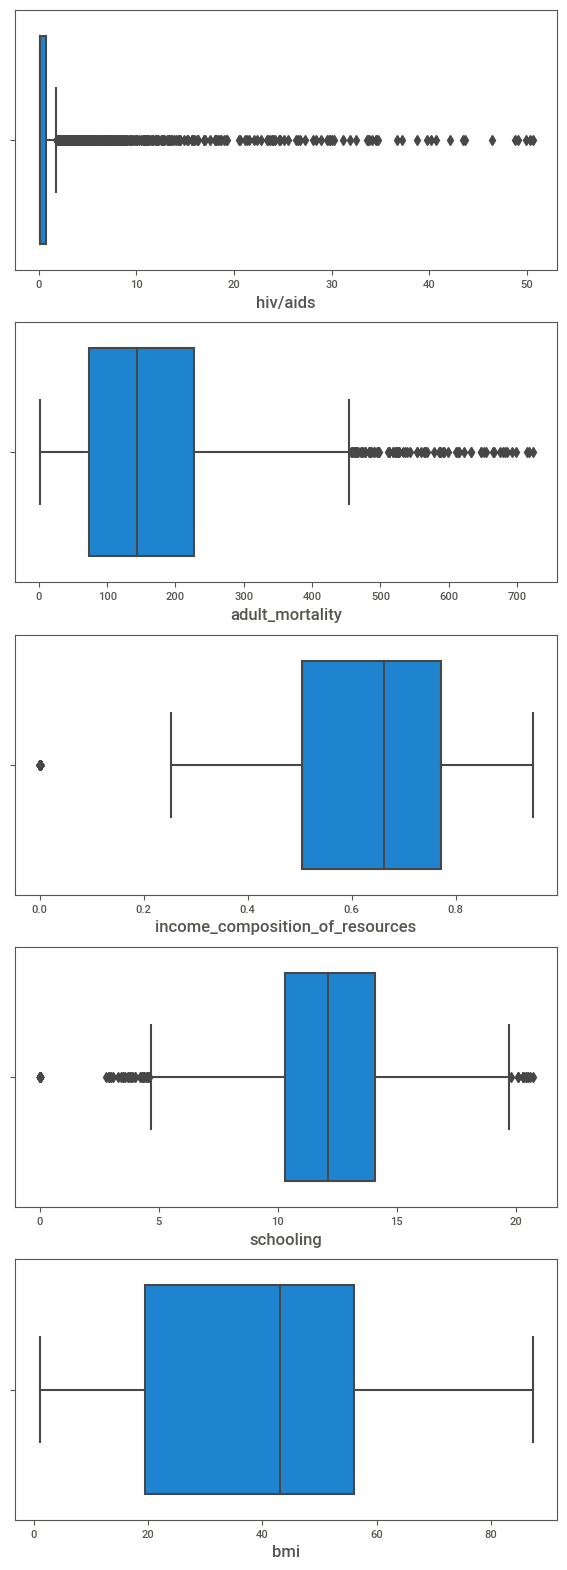

In [28]:

plt.figure(figsize=(7,20), facecolor='white')
plotnumber = 1

for column in reg_data.columns:
    if plotnumber<=9 : 
        ax = plt.subplot(5,1,plotnumber)
        sns.boxplot(x=reg_data[column])
        plt.xlabel(column,fontsize=12)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1 
plt.show()

C:\Users\sanch\AppData\Local\Temp\ipykernel_22584\1711485577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Life_expectancy']=data.Life_expectancy


<AxesSubplot:>

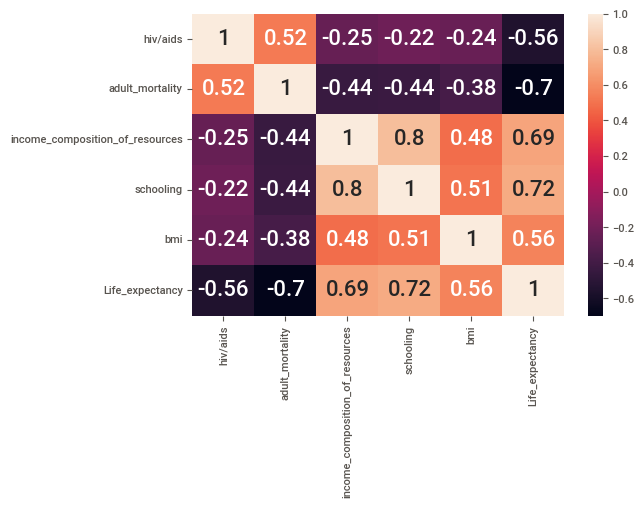

In [29]:
reg_data['Life_expectancy']=data.Life_expectancy
sns.heatmap(reg_data.corr(),  annot=True)

## Standardising Data

In [30]:
reg_data.drop('Life_expectancy',axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
reg_data[reg_data.columns]= sc.fit_transform(reg_data[reg_data.columns])
reg_data

C:\Users\sanch\AppData\Local\Temp\ipykernel_22584\120836226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data.drop('Life_expectancy',axis=1,inplace=True)
C:\Users\sanch\AppData\Local\Temp\ipykernel_22584\120836226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data[reg_data.columns]= sc.fit_transform(reg_data[reg_data.columns])


,hiv/aids,adult_mortality,income_composition_of_resources,schooling,bmi
0,-0.323445,0.791586,-0.725401,-0.579931,-0.964715
1,-0.323445,0.856072,-0.740050,-0.610570,-0.989810
2,-0.323445,0.831890,-0.769349,-0.641209,-1.014905
3,-0.323445,0.864132,-0.803531,-0.671847,-1.040000
4,-0.323445,0.888314,-0.847480,-0.763764,-1.060076
...,...,...,...,...,...
2933,6.275044,4.499494,-1.076989,-0.855681,-0.563194
2934,6.885650,4.435009,-1.023274,-0.763764,-0.583270
2935,7.496256,-0.739941,-0.979326,-0.610570,-0.603346
2936,7.949287,4.201249,-0.979326,-0.671847,-0.623422


In [31]:
X = reg_data #Independent Variables/Predictors
y = data.Life_expectancy #Dependent Variable

In [32]:
#Splitting the Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression() 
LR.fit(X_train,y_train) 
y_pred=LR.predict(X_test)

## Evaluation

In [34]:
from sklearn.metrics import r2_score
r2 =r2_score(y_test,y_pred)
r2 # R-squared is the proportion of the variance in the response variable that can be explained by the predictor variable.

0.764955950247171

In [35]:
n = len(data)
n

2938

In [36]:
#Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)] where k=number of predictors, n=total obs
#As we increase the number of independent variables in our equation, the R2 increases as well.
# Adjusted r2 penalizes the excess of independent variables which do not affect the dependent variable.

adjusted_r2 = 1 -((1-r2)*(n-1)/(n-5-1))
adjusted_r2

0.7645551247871559

In [37]:
rmse = mean_squared_error(y_test, y_pred,squared=False) 
rmse

4.600166488877211

<AxesSubplot:xlabel='Life_expectancy'>

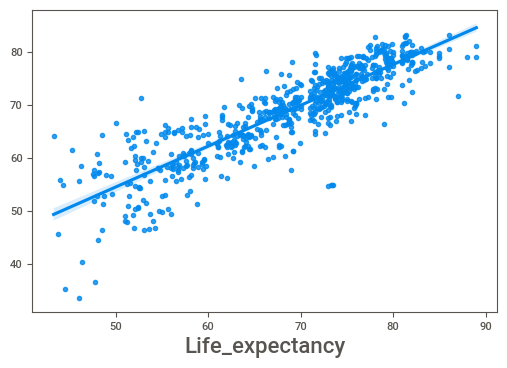

In [38]:
sns.regplot(x=y_test, y=y_pred)